# Library

In [19]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import feature_importance
%reload_ext autoreload

# Load data

In [5]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/Modal_Antar.csv")

In [8]:
df

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1


# feature importance

In [10]:
feature_importance(df,"kat_status",10).decision_tree()

ursar
feature_importance

Decision Tree

time span=  1


            Variables  Importance
0            pinjaman    0.472772
1  pengambilan_kredit    0.212482
2          pendapatan    0.208440
3         kepemilikan    0.069581
4          jabatan_id    0.025132
5                usia    0.011592
6    pengalaman_kerja    0.000000
7   jumlah_tanggungan    0.000000
8          pendidikan    0.000000
9       tenor_bulanan    0.000000


In [11]:
feature_importance(df,"kat_status",10).random_forest()

ursar
feature_importance

Random Forest

time span=  1


            Variables  Importance
0          pendapatan    0.269141
1            pinjaman    0.262253
2                usia    0.080419
3          jabatan_id    0.075305
4       tenor_bulanan    0.070312
5         kepemilikan    0.068395
6    pengalaman_kerja    0.067924
7  pengambilan_kredit    0.051491
8   jumlah_tanggungan    0.033728
9          pendidikan    0.021031


ursar
feature_importance



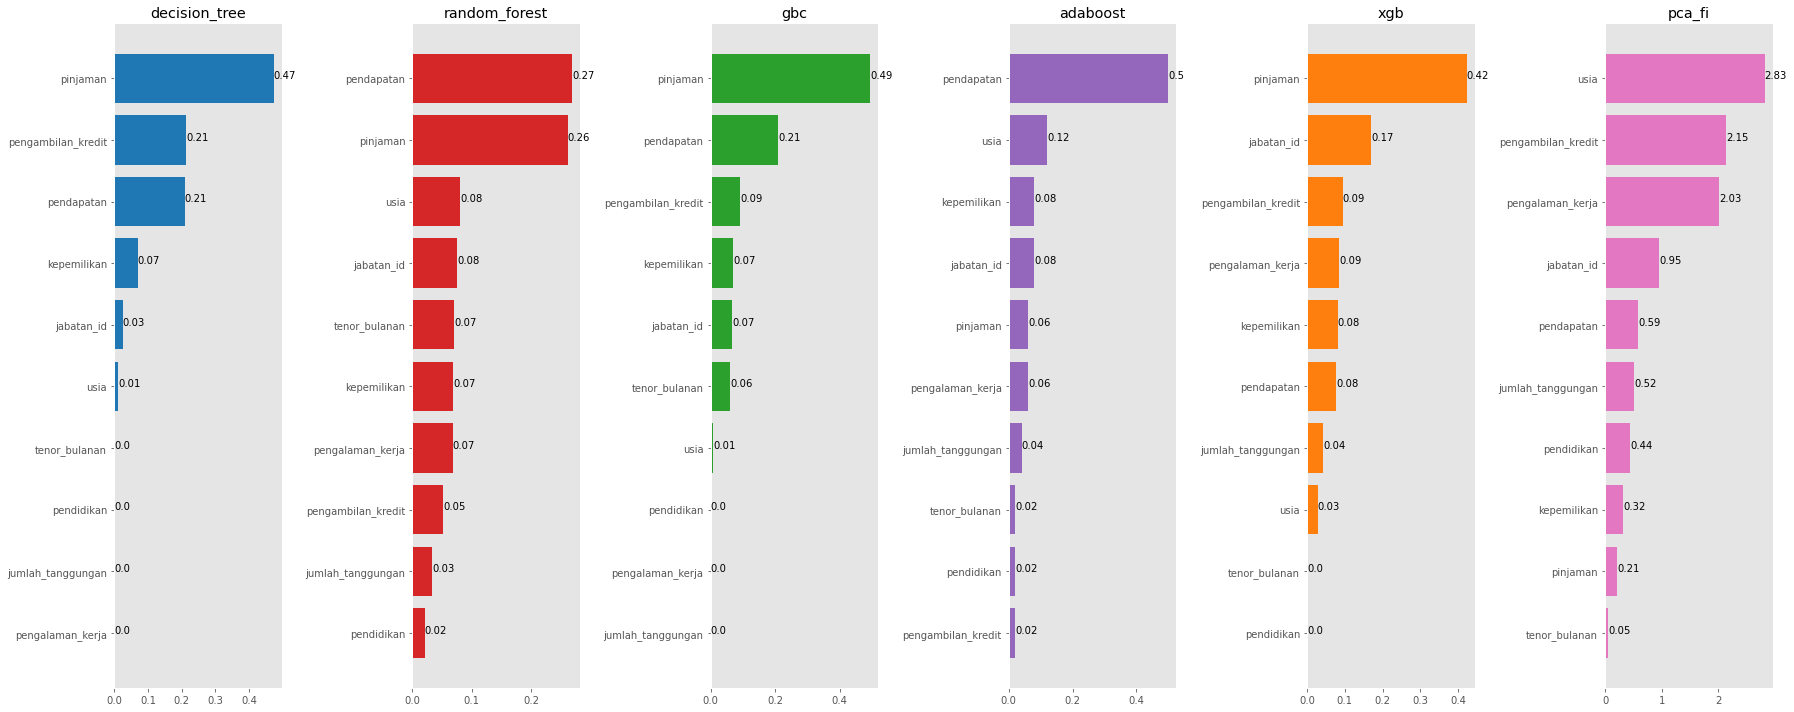

,name,decision_tree,random_forest,gbc,adaboost,xgb,pca_fi
0,usia,0.0116,0.0804,0.0086,0.12,0.0283,2.8296
1,pengambilan_kredit,0.2125,0.0515,0.0912,0.02,0.0948,2.1466
2,pengalaman_kerja,0.0000,0.0679,0.0000,0.06,0.0858,2.0266
3,jabatan_id,0.0251,0.0753,0.0677,0.08,0.1693,0.9545
4,pendapatan,0.2084,0.2691,0.2085,0.50,0.0770,0.5874
5,jumlah_tanggungan,0.0000,0.0337,0.0000,0.04,0.0421,0.5162
6,pendidikan,0.0000,0.0210,0.0000,0.02,0.0000,0.4423
7,kepemilikan,0.0696,0.0684,0.0690,0.08,0.0809,0.3152
8,pinjaman,0.4728,0.2623,0.4939,0.06,0.4219,0.2085
9,tenor_bulanan,0.0000,0.0703,0.0610,0.02,0.0000,0.0489


In [16]:
feature_importance(df,"kat_status",10).plot_FI(["decision_tree","random_forest","gbc","adaboost","xgb","pca_fi"])

ursar
feature_importance



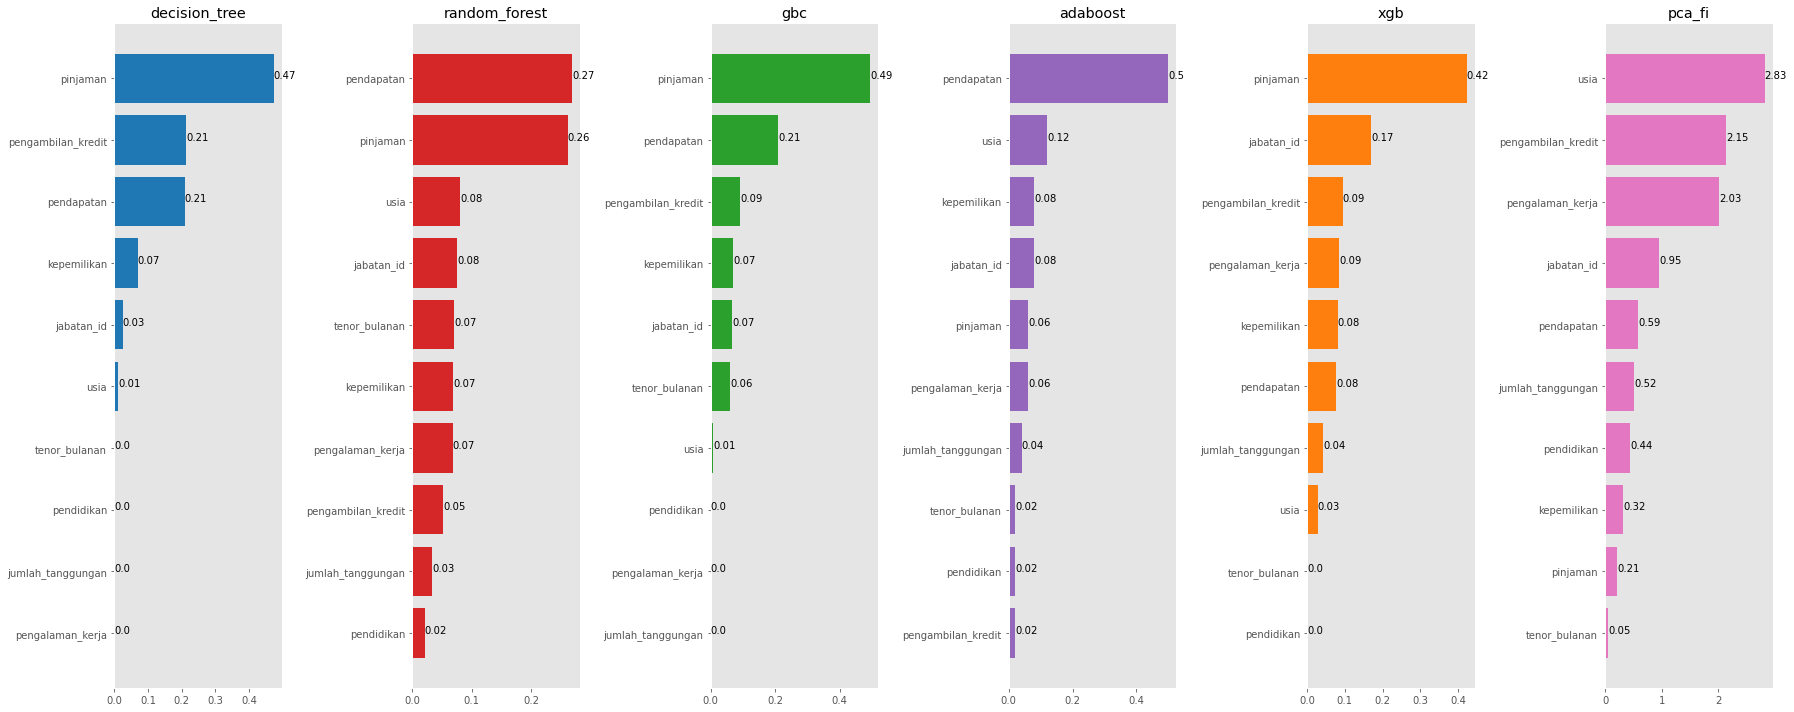

,features,decision_tree,random_forest,gbc,adaboost,xgb,pca_fi
0,usia,0.0116,0.0804,0.0086,0.12,0.0283,2.8296
1,pengambilan_kredit,0.2125,0.0515,0.0912,0.02,0.0948,2.1466
2,pengalaman_kerja,0.0000,0.0679,0.0000,0.06,0.0858,2.0266
3,jabatan_id,0.0251,0.0753,0.0677,0.08,0.1693,0.9545
4,pendapatan,0.2084,0.2691,0.2085,0.50,0.0770,0.5874
5,jumlah_tanggungan,0.0000,0.0337,0.0000,0.04,0.0421,0.5162
6,pendidikan,0.0000,0.0210,0.0000,0.02,0.0000,0.4423
7,kepemilikan,0.0696,0.0684,0.0690,0.08,0.0809,0.3152
8,pinjaman,0.4728,0.2623,0.4939,0.06,0.4219,0.2085
9,tenor_bulanan,0.0000,0.0703,0.0610,0.02,0.0000,0.0489


In [18]:
feature_importance(df,"kat_status",10).plot_FI(["all"])

# random forest mda

In [19]:
feature_importance.rf_mda(df.drop("kat_status" ,1),df["kat_status"]
                          ,nn=10,ts=0.2,rs=None,types='classification')

,feature,score
0,usia,1.3364
1,pendapatan,1.3144
2,pengambilan_kredit,1.0564
3,jabatan_id,1.0548
4,pendidikan,1.0332
5,pengalaman_kerja,0.3344
6,kepemilikan,0.2829
7,jumlah_tanggungan,0.2404
8,tenor_bulanan,0.2204
9,pinjaman,-0.8075


# VIFis

In [23]:
feature_importance.vif(df,"kat_status")

,features,VIF Factor
0,pengambilan_kredit,53.6506
1,tenor_bulanan,30.3342
2,jabatan_id,26.3305
3,usia,25.8146
4,pendidikan,24.2064
5,jumlah_tanggungan,12.8187
6,pinjaman,12.6975
7,pengalaman_kerja,10.6593
8,kepemilikan,5.4735
9,pendapatan,4.6335


# F test

In [25]:
ftest,selected_columns,removed_columns=feature_importance.f_test(df,"kat_status",10)

In [26]:
ftest

,names,scores,pvalues_
0,usia,0.136196,7.126877e-01
1,pengambilan_kredit,5.576538,1.967642e-02
2,pengalaman_kerja,4.490470,3.597162e-02
3,jabatan_id,4.548761,3.480772e-02
4,pendapatan,2.493180,1.167521e-01
5,jumlah_tanggungan,0.072603,7.880074e-01
6,pendidikan,1.797112,1.823822e-01
7,kepemilikan,1.589830,2.095915e-01
8,pinjaman,49.588981,9.613489e-11
9,tenor_bulanan,15.380567,1.410736e-04


# Recursive Feature Elimination

In [49]:
rf = RandomForestClassifier()

In [38]:
rfef,selected_rfe,removed_rfe = feature_importance.rfe(df,"kat_status", estimator, 1, 5, scoring=None)

In [39]:
rfef

,features,scores,grid_scores,pvalues_
0,usia,1,0.903134,True
1,pengambilan_kredit,3,0.947293,False
2,pengalaman_kerja,1,0.947578,True
3,jabatan_id,1,0.947009,True
4,pendapatan,1,0.947293,True
5,jumlah_tanggungan,2,0.947578,False
6,pendidikan,4,0.962393,False
7,kepemilikan,1,0.939886,True
8,pinjaman,1,0.947293,True
9,tenor_bulanan,1,0.939886,True


# combine all

In [106]:
test = feature_importance.score_value(df,"kat_status",estimator=rf)

ursar
feature_importance



In [107]:
test

,features,decision_tree,random_forest,gbc,adaboost,xgb,pca_fi,rf_mda,vif,f_test,rfe,rank
0,usia,0.0367,0.0413,0.0086,0.12,0.0283,2.8296,0.8593,25.8146,0.1362,4,5
1,pengambilan_kredit,0.1371,0.0569,0.1009,0.02,0.0948,2.1466,0.6400,53.6506,5.5765,6,4
2,pengalaman_kerja,0.0000,0.0371,0.0000,0.06,0.0858,2.0266,0.4906,10.6593,4.4905,3,6
3,jabatan_id,0.1960,0.0773,0.1001,0.08,0.1693,0.9545,0.2399,26.3305,4.5488,1,4
4,pendapatan,0.0124,0.2278,0.1760,0.50,0.0770,0.5874,1.4843,4.6335,2.4932,1,4
5,jumlah_tanggungan,0.0000,0.0188,0.0000,0.04,0.0421,0.5162,0.0934,12.8187,0.0726,7,8
6,pendidikan,0.0000,0.0274,0.0000,0.02,0.0000,0.4423,0.3541,24.2064,1.7971,8,8
7,kepemilikan,0.0696,0.0839,0.0690,0.08,0.0809,0.3152,0.2383,5.4735,1.5898,5,6
8,pinjaman,0.4728,0.3596,0.5055,0.08,0.4219,0.2085,-0.4446,12.6975,49.5890,1,4
9,tenor_bulanan,0.0754,0.0700,0.0397,0.00,0.0000,0.0489,0.9049,30.3342,15.3806,2,6
